In [3]:
import sys, os
from pathlib import Path
home = str(Path.home())
core_dir = home+'/repositories/ai-x/core'
sys.path.insert(0, core_dir)


from draw_Pharm2D import *
from shap_analysis import *
from misc import check_output_dir

# col_name = "SHAP Percent"
col_name = "consensus"
output_dir = "output_dir_shap"
check_output_dir(output_dir, keep_old = False)

datadir = "/Users/sjwon3789/box_drive/sjwon/selectivity_models"

# datadir_ml = "/home/wons2/repositories/ai-DR/models/selectivity_D2D3/selectivity_models/models_C33_0/"
datadir_ml = datadir+"/models_C33_0/"
#datadir_dnn = "/home/wons2/repositories/ai-DR/models/selectivity_D2D3/selectivity_models/models_C33_0/"
datadir_dnn = datadir+"/models_C33_0/"

# datadir_dnn = "/home/wons2/Shilab/sjwon3789/selectivity_models_C33_v19/models_C33_0/"

In [ ]:
import pickle
import numpy as np
from scipy.special import softmax

file_path = "/Users/sjwon3789/box_drive/sjwon/selectivity_models/models_C33_200/models_D3/model_0/reg_dnn_0.00"
filename = "shap_values_reg_dnn_0.00_87_864.dat"

# Open and load the pickle filepwd

with open(file_path, "rb") as file:
    shap_values = pickle.load(file)

    filename = f'{output_dir}/dict_data_{rand_state}_{random_split}.pickle'
    train_descs, test_descs, train_acts, test_acts, train_names, test_names, topo_names, phore_names, feature_names = retrieve_training_data(filename, tp)      

    # Get full list of SHAP values and store the raw and normalized values for each feature
    importances = []
    for i in range(shap_values.shape[1]):
        importances.append(np.mean(np.abs(shap_values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}
    # feature_importances_norm = {k: v for k, v in
    #                             sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse=True)}
    # Save the feature importances to a pickled .dat file
    # pickle.dump(feature_importances, open(self.output_dir + f"/feature_importances_{self.state}_{self.split}.dat", "wb"))

feature_importances

In [4]:
xfontsize = 16
ylim = [0, 0.20]
y_tick_interval = 0.02

In [ ]:
models = ["models_D2", "models_D3", "models__ratio_D2D3"]
#bar_color = "lightcoral"
bar_color = "orange"

for model in models:
    print(model)
    df_with_Ph2D, df_without_Ph2D = get_shap_consensus(datadir_ml, datadir_ml, datadir_dnn, model)
    save2png = f"{output_dir}/features_{model}_consensus_1.png"
    plot_shap(df_with_Ph2D, col_name, model + " (Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png=save2png)
    plot_shap(df_with_Ph2D, col_name, model + " (Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png="")

In [ ]:
df_with_Ph2D

,Features,Description,DNN,XGB,RF,consensus
0,Ph2D_16088,AR BG RR |0 5 6|5 0 1|6 1 0|,0.003708,0.053097,0.133501,0.063435
1,Ph2D_165,HA LH |0 4|4 0|,0.004105,0.037876,0.040868,0.027616
2,Ph2D_217,LH RR |0 0|0 0|,0.007694,0.020108,0.052503,0.026768
3,Ph2D_17269,AR HA LH |0 2 6|2 0 4|6 4 0|,0.003764,0.031394,0.035617,0.023592
4,Ph2D_17601,AR HA RR |0 2 6|2 0 5|6 5 0|,0.004029,0.020402,0.039242,0.021224
...,...,...,...,...,...,...
2009,Ph2D_31932,HA LH RR |0 4 6|4 0 5|6 5 0|,0.000452,0.000020,0.000070,0.000181
2010,Ph2D_15483,AR BG LH |0 0 1|0 0 0|1 0 0|,0.000470,0.000024,0.000038,0.000177
2011,Ph2D_32016,HA LH RR |0 6 5|6 0 2|5 2 0|,0.000510,0.000000,0.000017,0.000176
2012,Ph2D_20074,AR LH RR |0 6 1|6 0 4|1 4 0|,0.000490,0.000006,0.000022,0.000173


In [ ]:
df_with_Ph2D.head(30)

,Features,Description,DNN,XGB,RF,consensus
0,Ph2D_16088,AR BG RR |0 5 6|5 0 1|6 1 0|,0.003708,0.053097,0.133501,0.063435
1,Ph2D_165,HA LH |0 4|4 0|,0.004105,0.037876,0.040868,0.027616
2,Ph2D_217,LH RR |0 0|0 0|,0.007694,0.020108,0.052503,0.026768
3,Ph2D_17269,AR HA LH |0 2 6|2 0 4|6 4 0|,0.003764,0.031394,0.035617,0.023592
4,Ph2D_17601,AR HA RR |0 2 6|2 0 5|6 5 0|,0.004029,0.020402,0.039242,0.021224
5,Ph2D_17743,AR HA RR |0 5 6|5 0 1|6 1 0|,0.004075,0.022945,0.022991,0.016670
6,Ph2D_93,AR RR |0 2|2 0|,0.002300,0.011010,0.029144,0.014152
7,Ph2D_15522,AR BG LH |0 1 0|1 0 1|0 1 0|,0.003541,0.019652,0.016423,0.013205
8,Ph2D_16802,AR HA HD |0 0 0|0 0 0|0 0 0|,0.007490,0.014972,0.010266,0.010909
9,Ph2D_15057,AR BG HA |0 5 0|5 0 5|0 5 0|,0.007234,0.018868,0.004647,0.010250


In [ ]:
df_without_Ph2D

,Features,Description,DNN,XGB,RF,consensus
0,SlogP_VSA8,MOE logP VSA Descriptor 8 ( 0.25 <= x < 0...,0.021337,0.024411,0.040207,0.028652
1,SlogP_VSA5,MOE logP VSA Descriptor 5 ( 0.10 <= x < 0...,0.009756,0.024617,0.030692,0.021688
2,BalabanJ,"Chem. Phys. Lett. vol 89, 399-404, (1982)",0.010695,0.032608,0.016618,0.019974
3,NumRotatableBonds,Number of Rotatable Bonds,0.016734,0.019067,0.009216,0.015006
4,SMR_VSA7,MOE MR VSA Descriptor 7 ( 3.05 <= x < 3.63),0.009585,0.017273,0.014470,0.013776
...,...,...,...,...,...,...
195,fr_Al_COO,Number of aliphatic carboxylic acids,0.000000,0.000000,0.000000,0.000000
196,fr_benzodiazepine,Number of benzodiazepines with no addition...,0.000000,0.000000,0.000000,0.000000
197,fr_barbitur,Number of barbiturate groups,0.000000,0.000000,0.000000,0.000000
198,fr_diazo,Number of diazo groups,0.000000,0.000000,0.000000,0.000000


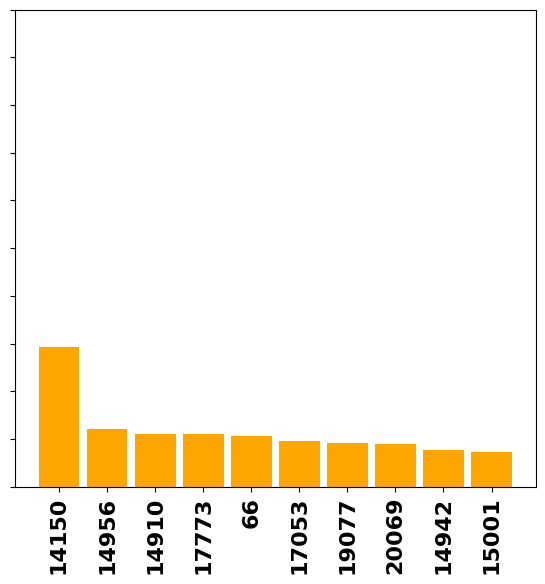

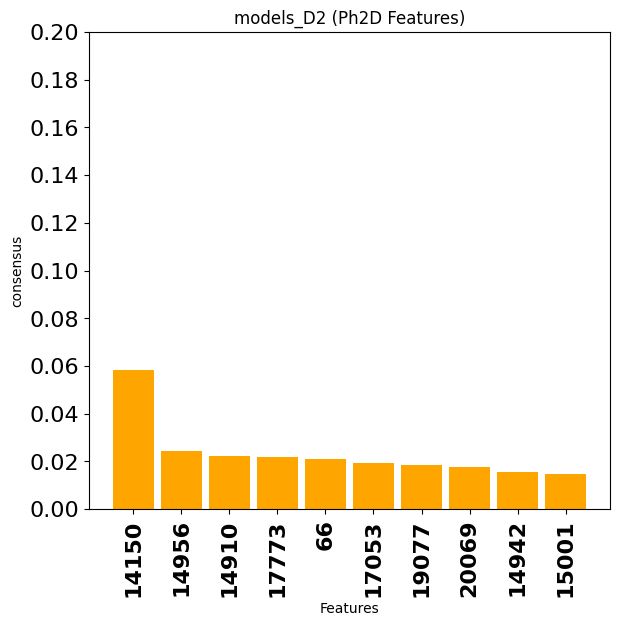

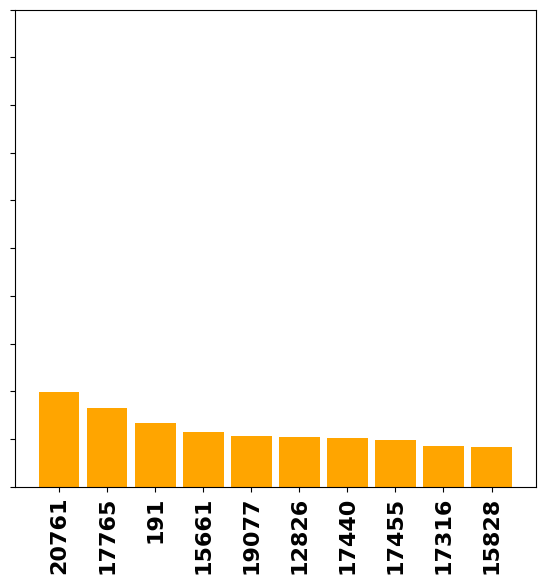

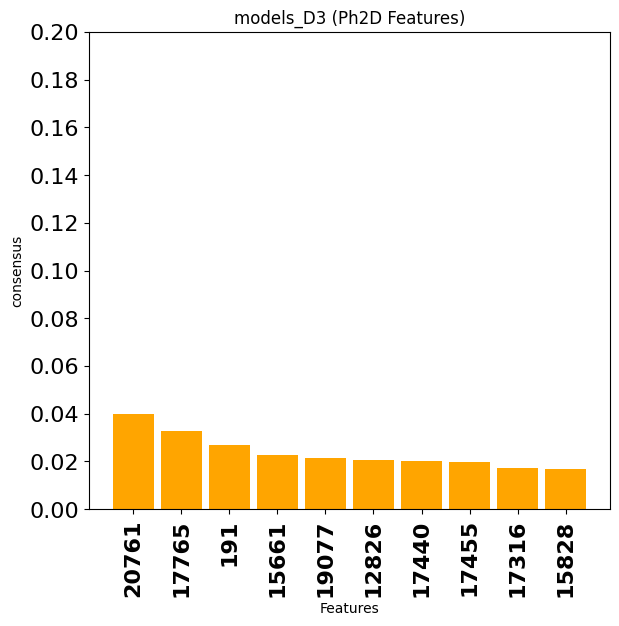

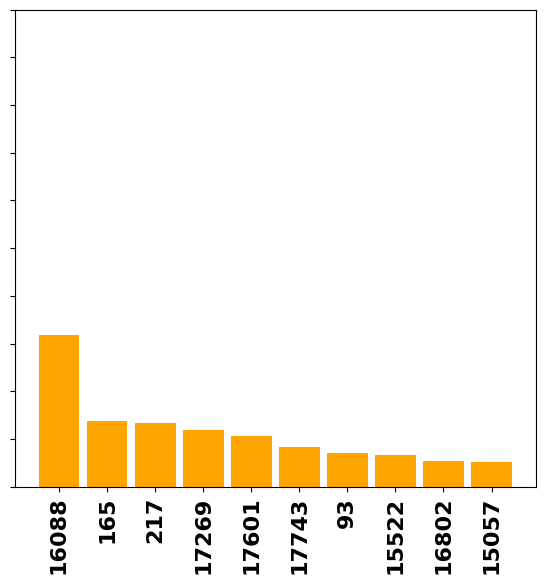

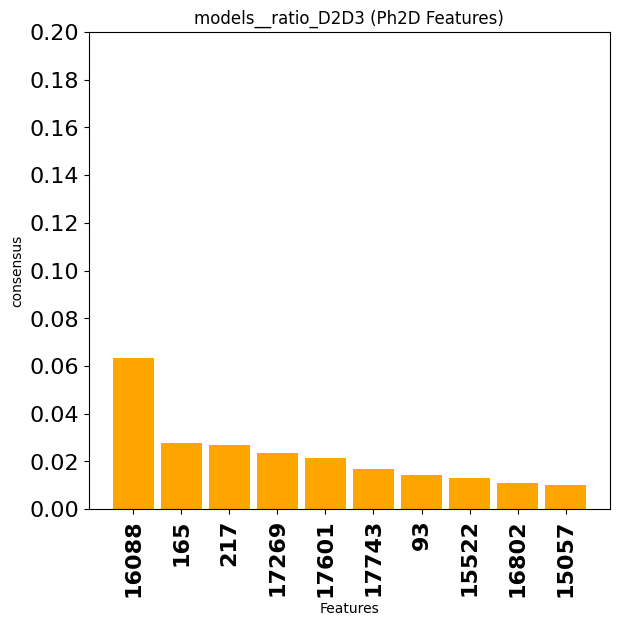

In [ ]:
models = ["models_D2", "models_D3", "models__ratio_D2D3"]
#bar_color = "lightcoral"
bar_color = "orange"

for model in models:
    print(model)
    df_with_Ph2D, df_without_Ph2D = get_shap_consensus(datadir_ml, datadir_ml, datadir_dnn, model)
    save2png = f"{output_dir}/features_{model}_consensus_1.png"
    plot_shap(df_with_Ph2D, col_name, model + " (Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png=save2png)
    plot_shap(df_with_Ph2D, col_name, model + " (Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png="")

In [ ]:
xfontsize = 16
ylim = [0, 0.20]
y_tick_interval = 0.02

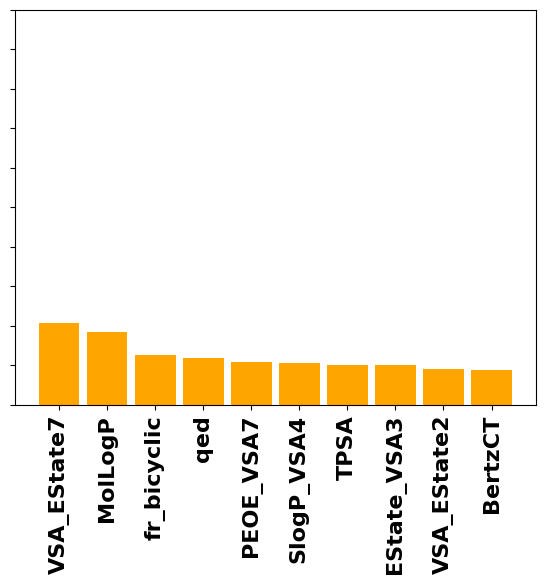

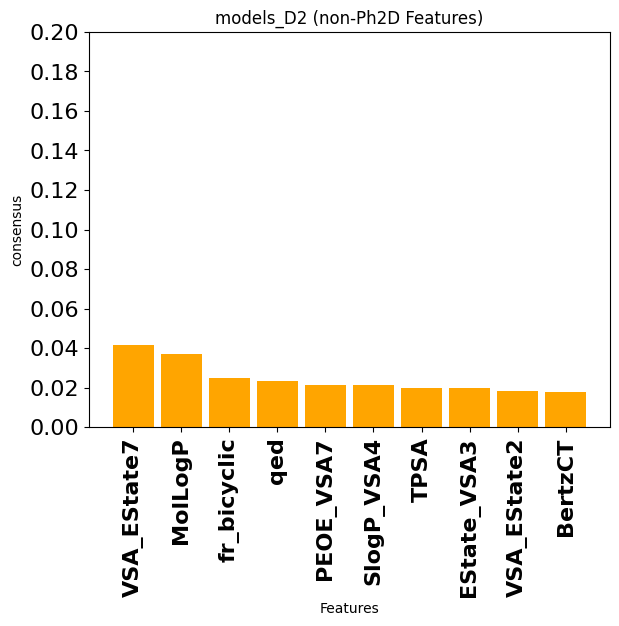

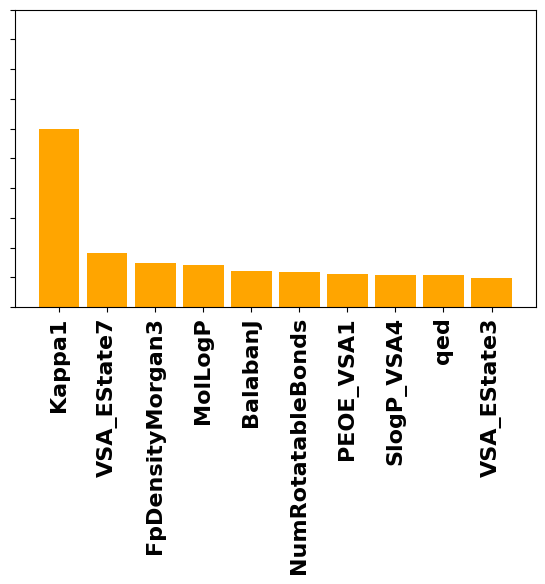

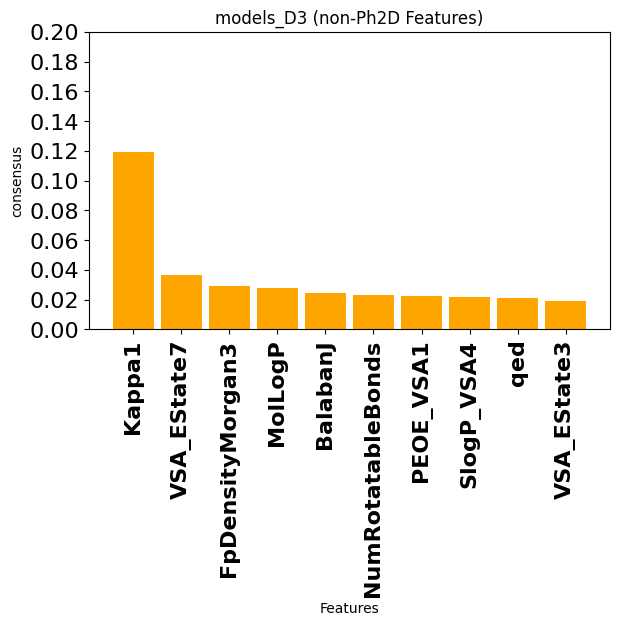

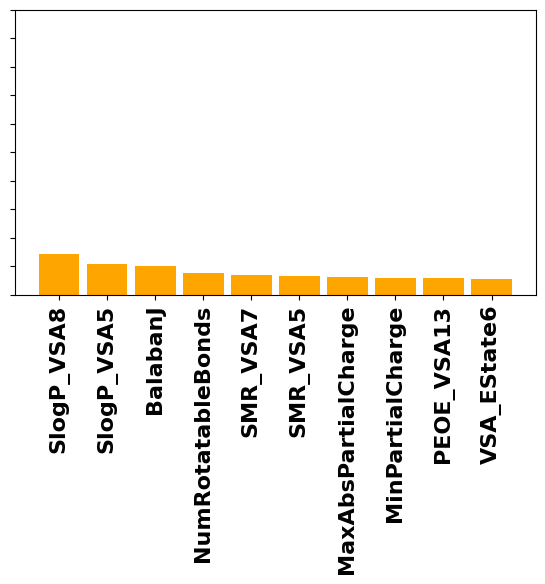

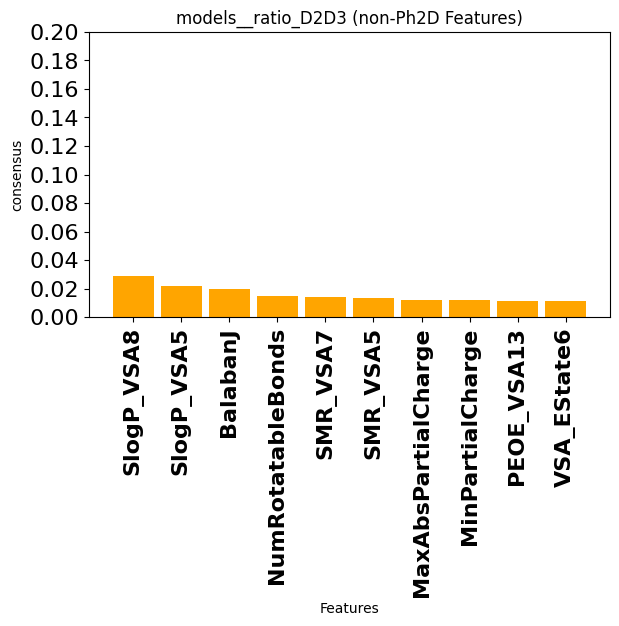

In [ ]:
models = ["models_D2", "models_D3", "models__ratio_D2D3"]
#bar_color = "mediumspringgreen"
bar_color = "orange"

for model in models:
    df_with_Ph2D, df_without_Ph2D = get_shap_consensus(datadir_ml, datadir_ml, datadir_dnn, model)
    save2png = f"{output_dir}/features_{model}_consensus_2.png"
    plot_shap(df_without_Ph2D, col_name, model + " (non-Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png=save2png)
    plot_shap(df_without_Ph2D, col_name, model + " (non-Ph2D Features)", ylim, y_tick_interval, xfontsize, bar_color, save2png="")